In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
data=pd.read_csv('/content/ACME-HappinessSurvey2020.csv')
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


##Data Cleaning

####Create a copy of base data for manupulation & pre- processing

In [4]:
happycustomer_data = data.copy()

In [5]:
happycustomer_data

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


In [6]:
happycustomer_data.shape

(126, 7)

In [7]:
happycustomer_data['Y'] = happycustomer_data['Y'].replace({0:'unhappy',1:'happy'})

In [8]:
happycustomer_data.head

<bound method NDFrame.head of            Y  X1  X2  X3  X4  X5  X6
0    unhappy   3   3   3   4   2   4
1    unhappy   3   2   3   5   4   3
2      happy   5   3   3   3   3   5
3    unhappy   5   4   3   3   3   5
4    unhappy   5   4   3   3   3   5
..       ...  ..  ..  ..  ..  ..  ..
121    happy   5   2   3   4   4   3
122    happy   5   2   3   4   2   5
123    happy   5   3   3   4   4   5
124  unhappy   4   3   3   4   4   5
125  unhappy   5   3   2   5   5   5

[126 rows x 7 columns]>

In [9]:
pd.set_option('display.max_columns',None)
happycustomer_data.head()

,Y,X1,X2,X3,X4,X5,X6
0,unhappy,3,3,3,4,2,4
1,unhappy,3,2,3,5,4,3
2,happy,5,3,3,3,3,5
3,unhappy,5,4,3,3,3,5
4,unhappy,5,4,3,3,3,5


In [10]:
## happycustomer_data.drop(["X2"],axis=1,inplace = True)

In [11]:
happycustomer_data.dtypes

Y     object
X1     int64
X2     int64
X3     int64
X4     int64
X5     int64
X6     int64
dtype: object

##Convert categorical feature to numerical feature

In [12]:
one_hot_encoded_data = pd.get_dummies(happycustomer_data, columns = [ 'Y'])
print(one_hot_encoded_data)

     X1  X2  X3  X4  X5  X6  Y_happy  Y_unhappy
0     3   3   3   4   2   4        0          1
1     3   2   3   5   4   3        0          1
2     5   3   3   3   3   5        1          0
3     5   4   3   3   3   5        0          1
4     5   4   3   3   3   5        0          1
..   ..  ..  ..  ..  ..  ..      ...        ...
121   5   2   3   4   4   3        1          0
122   5   2   3   4   2   5        1          0
123   5   3   3   4   4   5        1          0
124   4   3   3   4   4   5        0          1
125   5   3   2   5   5   5        0          1

[126 rows x 8 columns]


####Check the distribution of target variable

In [13]:
happycustomer_data['Y'].value_counts()

happy      69
unhappy    57
Name: Y, dtype: int64

##Declare feature vector and target variable

In [14]:
X = happycustomer_data.loc[:,happycustomer_data.columns!='Y']
y = happycustomer_data['Y']

In [15]:
X.shape

(126, 6)

#Split dataset into training and test set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

##Data Visulization

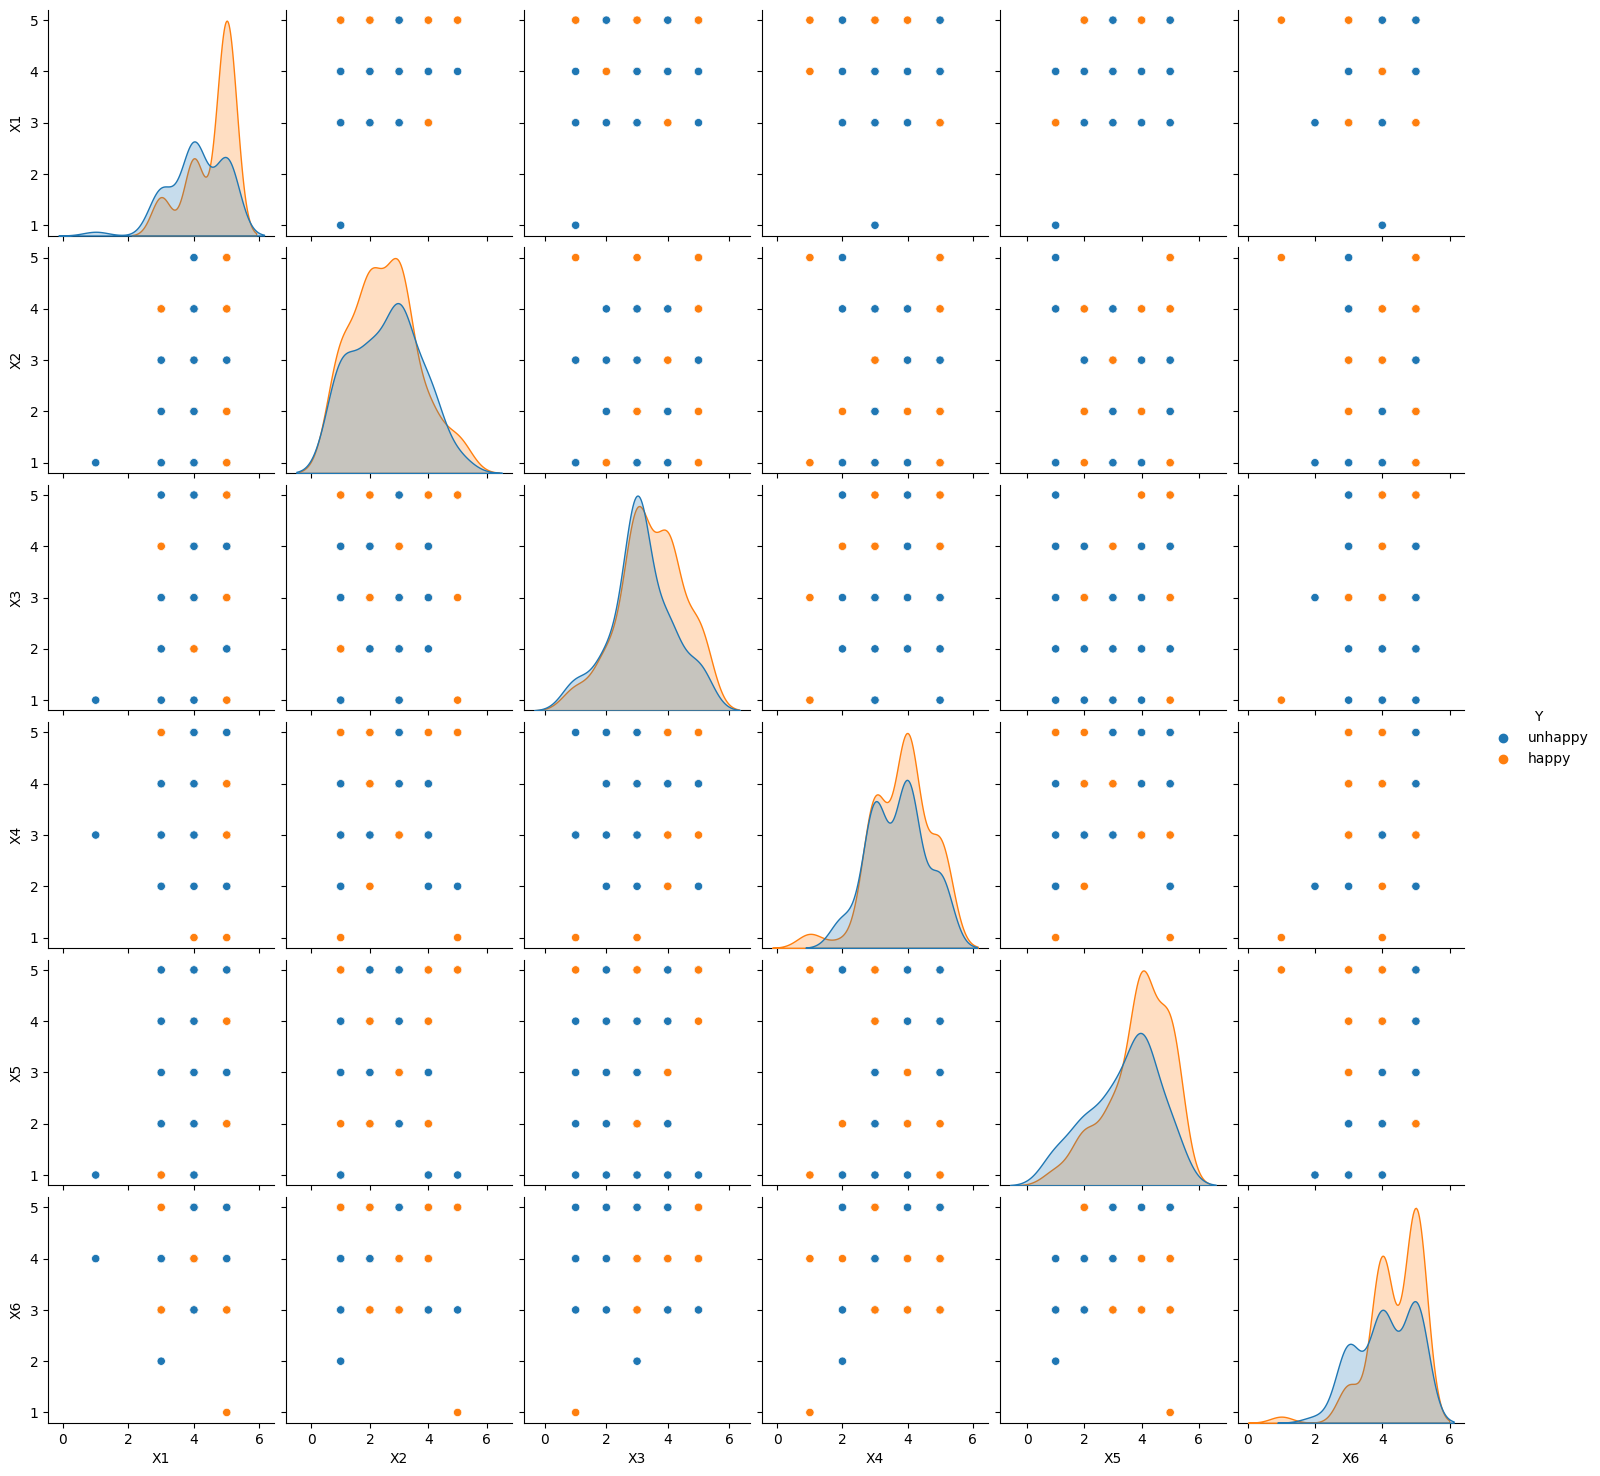

In [17]:
#pairplot
sns.pairplot(happycustomer_data,hue='Y')

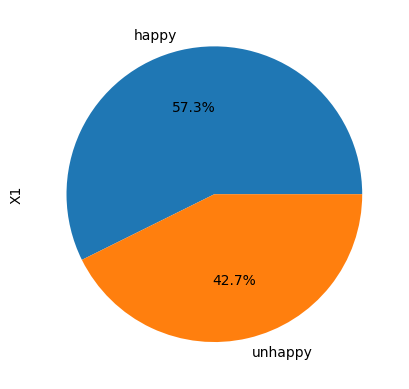

In [18]:
#pie plot
happycustomer_data_X1=happycustomer_data[['X1','Y']].groupby('Y').sum()
happycustomer_data_X1['X1'].plot(kind='pie',autopct='%1.1f%%')
plt.show()

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [20]:
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [21]:
data.shape

(126, 7)

In [22]:
data.isnull().sum()
#Checking for any Null values in the imported Datasets

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [23]:
#Assigning Dependent and Independent variables:
x=data.iloc[:,:1].values
y=data.iloc[:, 1:2].values

In [24]:
#Splitting the dataset into Training and Testing Dataset:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 42)

In [25]:
#Fitting the Model (Linear Regression):
model=LinearRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [26]:
print(y_pred)
print(y_test)

[[4.04761905]
 [4.04761905]
 [4.56896552]
 [4.04761905]
 [4.04761905]
 [4.56896552]
 [4.04761905]
 [4.56896552]
 [4.56896552]
 [4.56896552]
 [4.04761905]
 [4.04761905]
 [4.56896552]
 [4.56896552]
 [4.04761905]
 [4.04761905]
 [4.56896552]
 [4.04761905]
 [4.56896552]
 [4.04761905]
 [4.56896552]
 [4.56896552]
 [4.04761905]
 [4.04761905]
 [4.04761905]
 [4.04761905]]
[[5]
 [4]
 [3]
 [4]
 [3]
 [5]
 [4]
 [5]
 [5]
 [3]
 [5]
 [4]
 [5]
 [5]
 [5]
 [5]
 [5]
 [3]
 [4]
 [4]
 [5]
 [3]
 [4]
 [3]
 [5]
 [5]]


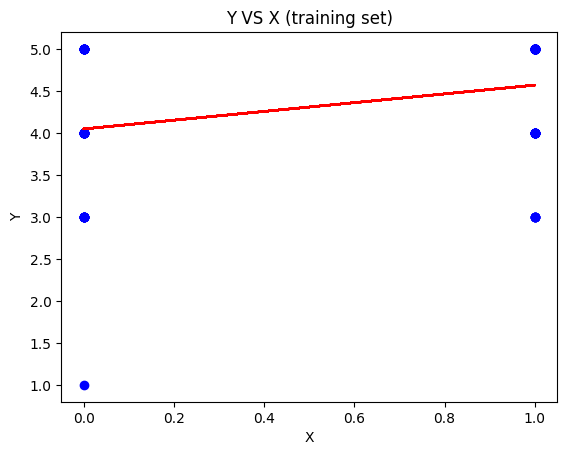

In [27]:
#Plot for Training dataset
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, model.predict(x_train), color='red')
plt.title('Y VS X (training set)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

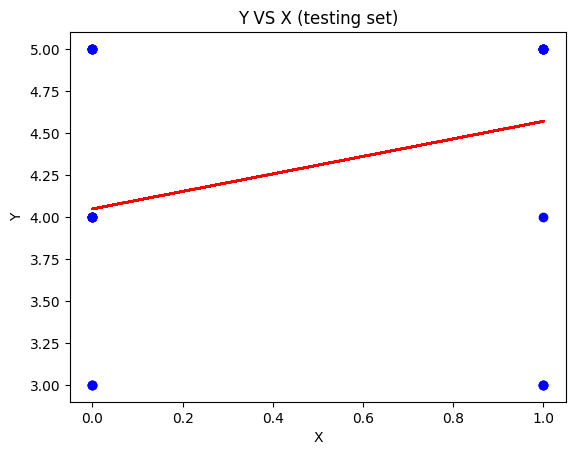

In [28]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_train, model.predict(x_train), color='red')
plt.title('Y VS X (testing set)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

##Logistic Regression

In [29]:
### Import Required Libraries
import pandas as pd
import numpy as np
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
#import seaborn as sns
#import pandas as pd
#import numpy as np
import matplotlib.gridspec as gridspec

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.preprocessing import MinMaxScaler

happycustomer_data = pd.read_csv('/content/ACME-HappinessSurvey2020.csv')

X = happycustomer_data.loc[:,happycustomer_data.columns!='Y']
y = happycustomer_data['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##scaler = MinMaxScaler() #saga solver requires features to be scaled for model conversion

##X_train = scaler.fit_transform(X_train)
##X_test = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('Precision of logistic regression classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred)))

Accuracy of logistic regression classifier on train set: 0.57
Accuracy of logistic regression classifier on test set: 0.62
Precision of logistic regression classifier on test set: 0.60


In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [32]:
happycustomer_data = data.copy()

In [33]:
#%% import dataset
data = pd.read_csv("/content/ACME-HappinessSurvey2020.csv")
y = happycustomer_data['Y']
x_data = data.drop(['X2'], axis=1)

In [34]:
# %%train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (1, 107)
x test:  (1, 19)
y train:  (107,)
y test:  (19,)


In [35]:
# %%initialize
# lets initialize parameters
# So what we need is dimension 4096 that is number of pixels as a parameter for our initialize method(def)
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.001)
    b = 0.0
    return w, b

In [36]:
#%% sigmoid
# calculation of z
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head
#y_head = sigmoid(5)

In [37]:
#%% forward and backward
# In backward propagation we will use y_head that found in forward progation
# Therefore instead of writing backward propagation method, lets combine forward propagation and backward propagation
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [38]:
#%%# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [39]:
#%%  # prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)

In [40]:
# sklearn
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 30)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 1.0 
train accuracy: 1.0 


In [41]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [42]:
import os
for dirname, _, filenames in os.walk('/content/ACME-HappinessSurvey2020.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [43]:
data = pd.read_csv('/content/ACME-HappinessSurvey2020.csv')

In [44]:
X.isnull().sum()
#We do not have any missing values

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [45]:
X.head()

,X1,X2,X3,X4,X5,X6
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5


In [46]:
#Check size of data
X.shape

(126, 6)

###Build Logistic Regression with Hyperparameter

In [47]:
logModel = LogisticRegression()

In [48]:
param_grid = [
    {##'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    ##'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [1, 5, 10, 20]
    }
]

###Import Grid Search

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [51]:
best_clf = clf.fit(x_train.T, y_train.T)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
best_clf.best_estimator_

LogisticRegression(C=0.03359818286283781, max_iter=5)

###Check Accuracy

In [53]:
print (f'Accuracy - : {best_clf.score(x_test.T,y_test.T):.3f}')

Accuracy - : 1.000


##Random Forest Classification

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('/content/ACME-HappinessSurvey2020.csv')

In [56]:
df_train = pd.read_csv("/content/ACME-HappinessSurvey2020.test.csv")
df_test = pd.read_csv("/content/ACME-HappinessSurvey2020.train.csv")

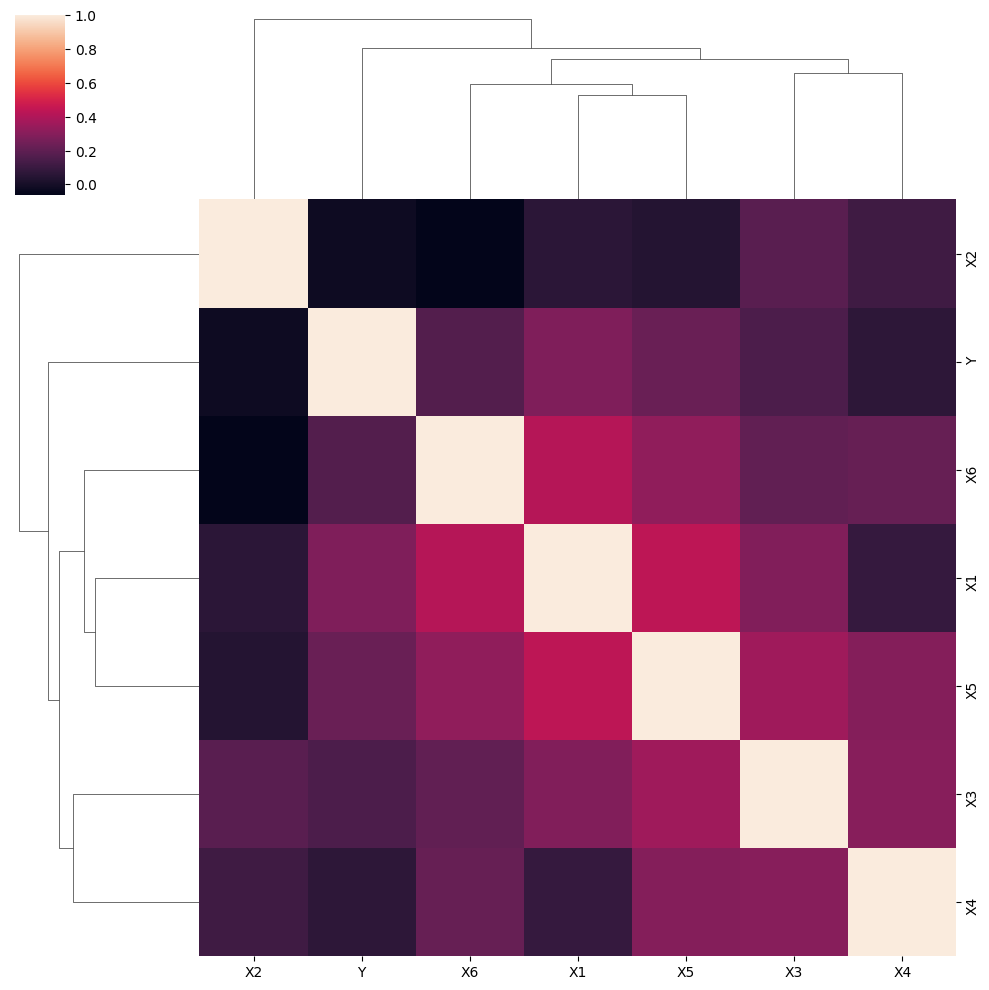

In [57]:
sns.clustermap(df_train.corr())

In [58]:
features = list(df_train.columns)

###Encoding the categorical features

In [59]:
encoded_df = pd.get_dummies(df_train[features])
encoded_dft = pd.get_dummies(df_test[features])

In [60]:
X = encoded_df
Y = df_train['Y']

###Splitting the data into train-test split

In [61]:
test_data = encoded_dft

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.02, random_state = 42)


###Hyperparameter tuning using RandomizedSearch CV

In [63]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}


In [64]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [65]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [66]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

###Print the best parameters

In [67]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': False}  



###Using the best parameters

In [68]:
randmf = RandomForestRegressor(n_estimators = 100, min_samples_split = 6, min_samples_leaf= 4, max_features = 'sqrt', max_depth= 120, bootstrap=False)
randmf.fit( X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=120, max_features='sqrt',
                      min_samples_leaf=4, min_samples_split=6)

In [69]:
y_pred_rf1 = pd.DataFrame( { "actual": y_test,
"predicted_prob": randmf.predict(
( X_test ) ) } )
y_pred_rf1

,actual,predicted_prob
73,0,0.082008
19,0,0.052298
116,1,0.639206


In [70]:
submission = pd.DataFrame({"y": y, "target":randmf.predict(test_data)})
submission.to_csv('submission.csv', index=False)

In [71]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
RandomizedSearchCV


sklearn.model_selection._search.RandomizedSearchCV

###Load the Dataset

In [72]:
data = pd.read_csv( "/content/ACME-HappinessSurvey2020.csv")
data.head(7)

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
5,1,5,5,3,5,5,5
6,0,3,1,2,2,1,3


In [73]:
data['Y'].value_counts()

1    69
0    57
Name: Y, dtype: int64

###Prepare and Split the Data

In [74]:
X = data.drop("Y", axis=1)
y = data['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y,
									test_size=0.25,
									random_state=42)
X_train.shape, X_test.shape


((94, 6), (32, 6))

###Build Random Forest Model

In [75]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

# predict the mode
y_pred = model.predict(X_test)

# performance evaluatio metrics
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.47      0.73      0.57        11
           1       0.80      0.57      0.67        21

    accuracy                           0.62        32
   macro avg       0.64      0.65      0.62        32
weighted avg       0.69      0.62      0.63        32



In [76]:
param_grid = {
	'n_estimators': [25, 50, 100, 150],
	'max_features': ['sqrt', 'log2', None],
	'max_depth': [3, 6, 9],
	'max_leaf_nodes': [3, 6, 9],
}

###Hyperparameter Tuning- GridSearchCV

In [77]:
grid_search = GridSearchCV(RandomForestClassifier(),
						param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=3, max_leaf_nodes=3, n_estimators=25)


###Update the Model

In [78]:
model_grid = RandomForestClassifier(max_depth=9,
									max_features="log2",
									max_leaf_nodes=9,
									n_estimators=15)
model_grid.fit(X_train, y_train)
y_pred_grid = model.predict(X_test)
print(classification_report(y_pred_grid, y_test))


              precision    recall  f1-score   support

           0       0.47      0.73      0.57        11
           1       0.80      0.57      0.67        21

    accuracy                           0.62        32
   macro avg       0.64      0.65      0.62        32
weighted avg       0.69      0.62      0.63        32



###Hyperparameter Tuning- RandomizedSearchCV

In [79]:
random_search = RandomizedSearchCV(RandomForestClassifier(),
								param_grid)
random_search.fit(X_train, y_train)
print(random_search.best_estimator_)


RandomForestClassifier(max_depth=3, max_features=None, max_leaf_nodes=3)


###Update the model

In [80]:
model_random = RandomForestClassifier(max_depth=3,
									max_features='log2',
									max_leaf_nodes=6,
									n_estimators=100)
model_random.fit(X_train, y_train)
y_pred_rand = model.predict(X_test)
print(classification_report(y_pred_rand, y_test))


              precision    recall  f1-score   support

           0       0.47      0.73      0.57        11
           1       0.80      0.57      0.67        21

    accuracy                           0.62        32
   macro avg       0.64      0.65      0.62        32
weighted avg       0.69      0.62      0.63        32



###Random Forest Classifier model with default parameters

#Random Forest Classifier model with parameter n_estimators=100

In [100]:
from sklearn.metrics import accuracy_score

In [101]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(X_train, y_train)

# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)


# Check accuracy score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.4211


##Find important features with Random Forest model

In [82]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [83]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

X3    0.199540
X2    0.186671
X1    0.172147
X5    0.161516
X4    0.157806
X6    0.122319
dtype: float64

##Visualize feature scores of the features

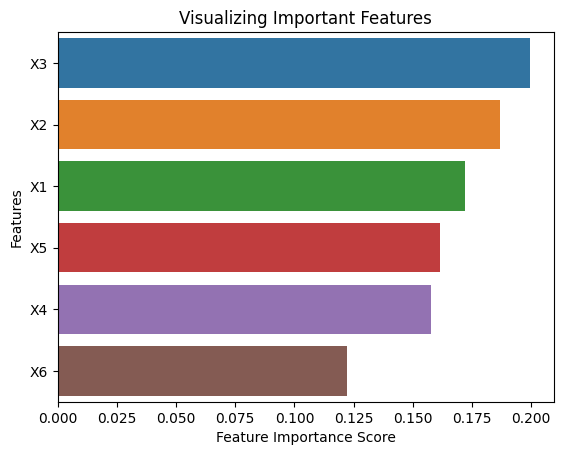

In [84]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

##Build Random Forest model on selected features

In [85]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [86]:
y_pred_train_RF = clf.predict(X_test)

y_pred_train_RF

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1])

##Confusion matrix

In [87]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_train_RF)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[13 10]
 [ 4 15]]


In [88]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [89]:
# Splitting the dataset features into X and y
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [90]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [91]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [92]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 5)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=5)

In [93]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[4 4]
 [4 4]
 [4 4]
 [4 4]
 [5 5]
 [4 4]
 [4 4]
 [5 5]
 [5 5]
 [5 4]
 [4 3]
 [3 3]
 [4 3]
 [5 3]
 [3 5]
 [5 5]
 [5 5]
 [4 4]
 [4 4]]


In [94]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1 2 1]
 [0 8 1]
 [1 0 5]]


0.7368421052631579

In [95]:
X = happycustomer_data.loc[:,happycustomer_data.columns!='Y']
y = happycustomer_data['Y']

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [97]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.4211


In [98]:
one_hot_encoded_data = pd.get_dummies(happycustomer_data, columns = [ 'Y'])
print(one_hot_encoded_data)

     X1  X2  X3  X4  X5  X6  Y_0  Y_1
0     3   3   3   4   2   4    1    0
1     3   2   3   5   4   3    1    0
2     5   3   3   3   3   5    0    1
3     5   4   3   3   3   5    1    0
4     5   4   3   3   3   5    1    0
..   ..  ..  ..  ..  ..  ..  ...  ...
121   5   2   3   4   4   3    0    1
122   5   2   3   4   2   5    0    1
123   5   3   3   4   4   5    0    1
124   4   3   3   4   4   5    1    0
125   5   3   2   5   5   5    1    0

[126 rows x 8 columns]


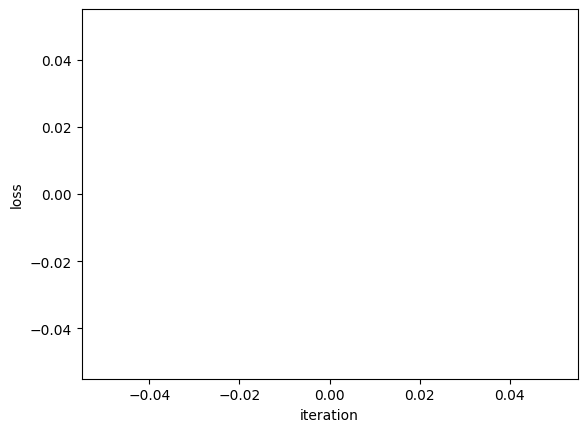

In [99]:
loss_v=[]
plt.plot(range(len(loss_v)),loss_v)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()